<br> **CUSP Applied Data Science course project**
<br> December 2018
<br> Professor Tim Savage
<br> created by Eve Marenghi and Tarek Arafat

## An investigation into the rate of return to solar photovoltaic panel installation

In [1]:
# import packages 
import pandas as pd
import os
from urllib.request import Request, urlopen
import json
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime
import numpy as np
import pandas_datareader.data as web
import pymc3 as pm
from tabulate import tabulate
from sklearn import neighbors, datasets
import statsmodels.formula.api as smf
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as preprocessing
try: 
    import urllib2 as urllib
except ImportError: 
    import urllib.request as urllib
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

## upload the data

**PLUTO DATA DICTIONARY** from https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=18v1
- APPDate: The date of the Apportionment
- Address: An address for the tax lot
- AssessLand: The tentative assessed land value for Fiscal Year 2018
- AssessTot: The tentative assessed total value for Fiscal Year 2018
- BldgArea: The total gross area in square feet
- BldgClass: A code describing the major use of structures on the tax lot
- Borough: The borough that the tax lot is located in
- BuiltFAR: The Built Floor Area Ratio (FAR) is the total building floor area divided by the area of the tax lot
- CB2010: The 2010 census block that the tax lot is located in
- CT2010: The 2010 census tract that the tax lot is located in
- ComArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for commercial use
- CommFAR: The Maximum Allowable Commercial Floor Area Ratio (FAR)
- GarageArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for garage use
- Lot: The number of the tax lot.
- LotArea: Total area of the tax lot, expressed in square feet rounded to the nearest integer
- LotType: A code indicating the location of the tax lot to another tax lot and/or the water
- NumBldgs: The number of buildings on the tax lot.
- NumFloors: In the tallest building on the tax lot, the number of full and partial stories starting from the ground floor
- OfficeArea: An estimate of the exterior dimensions of the portion of the structure(s)
- ResArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use
- ResidFAR: The Maximum Allowable Residential Floor Area Ratio (FAR) 
- UnitsRes: The sum of residential units in all buildings on the tax lot
- UnitsTotal: The sum of residential and non-residential (offices, retail stores, etc.) units in all buildings on the tax lot
- Version: The Version Number related to the release of PLUTO
- XCoord: The X coordinate of the XY coordinate pair which depicts the approximate location of the lot
- YCoord: The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot (The XY coordinates are expressed in the New York-Long Island State Plane coordinate system)
- YearBuilt: The year construction of the building was completed
- ZipCode: The zip code that the tax lot is located in

In [2]:
# read in the 2018 PLUTO data
mn = pd.read_csv("MN_18v1.csv")
bk = pd.read_csv("BK_18v1.csv")
bx = pd.read_csv("BX_18v1.csv")
qn = pd.read_csv("QN_18v1.csv")
si = pd.read_csv("SI_18v1.csv")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/interac

In [3]:
# keep only the columns we need
bk_ = bk[['Address', 'AssessLand', 'AssessTot',
       'BldgArea', 'BldgClass', 'Borough', 'BuiltFAR', 'CB2010', 'CT2010',
       'Lot', 'LotArea', 'LotType', 'NumBldgs', 'NumFloors',  'UnitsTotal', 
       'Version', 'XCoord','YCoord', 'YearBuilt', 'ZipCode']]
mn_ = mn[['Address', 'AssessLand', 'AssessTot',
       'BldgArea', 'BldgClass', 'Borough', 'BuiltFAR', 'CB2010', 'CT2010',
       'Lot', 'LotArea', 'LotType', 'NumBldgs', 'NumFloors',  'UnitsTotal', 
       'Version', 'XCoord','YCoord', 'YearBuilt', 'ZipCode']]
qn_ = qn[['Address', 'AssessLand', 'AssessTot',
       'BldgArea', 'BldgClass', 'Borough', 'BuiltFAR', 'CB2010', 'CT2010',
       'Lot', 'LotArea', 'LotType', 'NumBldgs', 'NumFloors',  'UnitsTotal', 
       'Version', 'XCoord','YCoord', 'YearBuilt', 'ZipCode']]
si_ = si[['Address', 'AssessLand', 'AssessTot',
       'BldgArea', 'BldgClass', 'Borough', 'BuiltFAR', 'CB2010', 'CT2010',
       'Lot', 'LotArea', 'LotType', 'NumBldgs', 'NumFloors',  'UnitsTotal', 
       'Version', 'XCoord','YCoord', 'YearBuilt', 'ZipCode']]
bx_ = bx[['Address', 'AssessLand', 'AssessTot',
       'BldgArea', 'BldgClass', 'Borough', 'BuiltFAR', 'CB2010', 'CT2010',
       'Lot', 'LotArea', 'LotType', 'NumBldgs', 'NumFloors',  'UnitsTotal', 
       'Version', 'XCoord','YCoord', 'YearBuilt', 'ZipCode']]

In [4]:
# concatenate borough dataframes 
pluto = pd.concat([mn_, bk_, bx_, qn_, si_])

In [5]:
# read nyserda data into a df 
solar = pd.read_csv("solar_data.csv")

In [6]:
# keep only the columns we need 
ny = solar[['Address', 'Zip', 'Borough', 'Total System Size', 'Cost per Watt', 
              'Total Cost Before NYSERDA Incentive', 'Application Received Date']]

In [7]:
ny.shape

(1896, 7)

## data cleaning

In [8]:
# lowercase addresses
ny['Address'] = ny['Address'].str.lower()
pluto['Address'] = pluto['Address'].str.lower()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
# replace north, south, east, west 
ny['Address'] = ny['Address'].str.replace(" n ", "north")
ny['Address'] = ny['Address'].str.replace(" s ", "south")
ny['Address'] = ny['Address'].str.replace(" e ", "east")
ny['Address'] = ny['Address'].str.replace(" w ", "west")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [10]:
# remove white space from end of address 
ny['Address'] = ny['Address'].str.rstrip()
# remove fl from end of addresses 
ny['Address'] = ny['Address'].str.rstrip("fl")
# remove white space
ny['Address'] = ny['Address'].str.rstrip()
# remove 1, 2, 3 from end of address 
ny['Address'] = ny['Address'].str.rstrip("1")
ny['Address'] = ny['Address'].str.rstrip("2")
ny['Address'] = ny['Address'].str.rstrip("3")
# remove hashes 
ny['Address'] = ny['Address'].str.replace("#", "")
# remove periods 
ny['Address'] = ny['Address'].str.replace(".", "")
# remove white space
ny['Address'] = ny['Address'].str.rstrip()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [11]:
# replace ave, expy
ny['Address'] = ny['Address'].str.replace(" ave ", "avenue")
ny['Address'] = ny['Address'].str.replace("expy", "expressway")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# remove trailing rd and st 
ny['Address'] = ny['Address'].str.replace(" rd ", "")
ny['Address'] = ny['Address'].str.replace(" st ", "")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# replace th, rd, nd
ny['Address'] = ny['Address'].str.replace("th", "")
ny['Address'] = ny['Address'].str.replace("rd", "")
ny['Address'] = ny['Address'].str.replace("nd", "")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [14]:
# merge dfs 
merged = pluto.merge(ny,  how='inner', left_on=['ZipCode','Address'], 
                     right_on = ['Zip', 'Address'])

In [15]:
# check merged shape 
merged.shape

(1259, 26)

In [16]:
# calculate age for each building
merged['Age'] = 2018 - merged['YearBuilt']

In [17]:
# drop non residential building types 
residential = merged.drop(merged[(merged['BldgClass'] == 'E1') |
                        (merged['BldgClass'] == 'E7') | (merged['BldgClass'] == 'V9')].index)

In [18]:
# drop row where age = 2018
residential = residential.drop(residential[(residential.Age == 2018)].index)
# keep lots with one building only 
residential = residential[residential.NumBldgs == 1]
# drop rows where Assesstot = 0 
# The Department of Finance calculates the assessed value by multiplying the
# tax lot’s estimated full market value by a uniform percentage for the property’s
# tax class.
residential = residential.drop(residential[(residential.AssessTot == 0)].index)

In [19]:
# rename columns 
residential = residential.rename(columns={'Total System Size':'SystemSizekWh', 'Borough_x':'Bor'})

In [20]:
# get the percentage of properties in each borough 
print("Percentage of properties in Queens:", 
      (len(residential.loc[residential.Bor == 'QN'].Address) / len(residential.index)) * 100, "%")
print("Percentage of properties in Brooklyn:", 
      (len(residential.loc[residential.Bor == 'BK'].Address) / len(residential.index)) * 100, "%")
print("Percentage of properties in the Bronx:", 
      (len(residential.loc[residential.Bor == 'BX'].Address) / len(residential.index)) * 100, "%")
print("Percentage of properties in Manhattan:", 
      (len(residential.loc[residential.Bor == 'MN'].Address) / len(residential.index)) * 100, "%")
print("Percentage of properties in Staten Island:", 
      (len(residential.loc[residential.Bor == 'SI'].Address) / len(residential.index)) * 100, "%")

Percentage of properties in Queens: 31.267217630853995 %
Percentage of properties in Brooklyn: 42.14876033057851 %
Percentage of properties in the Bronx: 26.170798898071624 %
Percentage of properties in Manhattan: 0.13774104683195593 %
Percentage of properties in Staten Island: 0.27548209366391185 %


In [21]:
# drop Manhattan and Staten Island because they are not statistically significant 
residential = residential[(residential.Bor == 'QN') | (residential.Bor == 'BX') |
                         (residential.Bor == 'BK')]

In [22]:
# group by zip code 
zip_grouped = residential.groupby('ZipCode').count()
zip_grouped.reset_index(inplace=True)

In [23]:
# create a 'weights' table 
weights = zip_grouped[['ZipCode', 'Address']]
weights = weights.rename(columns={'Address':'occurrences'})

In [24]:
# get the weight for each zipcode to replicate distribution 
weights['weight'] = weights.occurrences / weights.occurrences.sum()

In [25]:
# join with the weights table for sampling 
pluto_zips = pluto.merge(weights, left_on='ZipCode', right_on='ZipCode', how='inner')

In [26]:
# take sample of the pluto table with desired zipcode distribution  
pluto_weighted = pluto_zips.sample(n=726, replace=False, random_state=1824, weights='weight')

In [27]:
# count how many occurrences we have of each zip code 
test = pluto_weighted.groupby('ZipCode').count()
test = test.reset_index()

In [28]:
# join test with weights to check distribution 
test2 = test.merge(weights, left_on='ZipCode', right_on='ZipCode')

In [29]:
# calculate the difference to make sure we have the correct distribution by zip code 
test2['diff'] = test2.Address - test2.occurrences_x
# correct --> difference = 0 means we have the same number for each zipcode 
test2['diff'].unique()

array([0])

In [30]:
# rename table to no_solar
no_solar = pluto_weighted

In [31]:
# make sure there is no overlap between residential and no_solar tables 
overlap_check = residential.merge(no_solar, left_on='Address', right_on='Address', how='inner')
overlap_check.head()

,Address,AssessLand_x,AssessTot_x,BldgArea_x,BldgClass_x,Bor,BuiltFAR_x,CB2010_x,CT2010_x,Lot_x,...,NumBldgs_y,NumFloors_y,UnitsTotal_y,Version_y,XCoord_y,YCoord_y,YearBuilt_y,ZipCode_y,occurrences,weight
0,4057 barnes avenue,10908,38541,4572,C0,BX,1.00,2000.0,406.00,88,...,1,3.00,3,18V1,1023918.0,263341.0,1990,10466.0,32,0.044260
1,130-47 244 street,9540,26100,1483,A2,QN,0.41,1006.0,616.02,1,...,1,1.67,1,18V1,1059843.0,185974.0,1955,11422.0,14,0.019364


In [32]:
# drop overlap addresses
no_solar.drop(no_solar[no_solar.Address == '4057 barnes avenue'].index, inplace=True)
no_solar.drop(no_solar[no_solar.Address == '130-47 244 street'].index, inplace=True)

In [33]:
# make sure there is no overlap between residential and no_solar tables 
overlap_check = residential.merge(no_solar, left_on='Address', right_on='Address', how='inner')
overlap_check.head()

,Address,AssessLand_x,AssessTot_x,BldgArea_x,BldgClass_x,Bor,BuiltFAR_x,CB2010_x,CT2010_x,Lot_x,...,NumBldgs_y,NumFloors_y,UnitsTotal_y,Version_y,XCoord_y,YCoord_y,YearBuilt_y,ZipCode_y,occurrences,weight


In [34]:
# add age to the no_solar table 
no_solar['Age'] = 2018 - no_solar['YearBuilt']
# drop rows with AssessTot = 0
no_solar = no_solar.drop(no_solar[(no_solar.AssessTot == 0)].index)

In [35]:
# get the percentage of properties in each borough 
print("Percentage of properties in Queens:", 
      (len(no_solar.loc[no_solar.Borough == 'QN'].Address) / len(no_solar.index)) * 100, "%")
print("Percentage of properties in Brooklyn:", 
      (len(no_solar.loc[no_solar.Borough == 'BK'].Address) / len(no_solar.index)) * 100, "%")
print("Percentage of properties in the Bronx:", 
      (len(no_solar.loc[no_solar.Borough == 'BX'].Address) / len(no_solar.index)) * 100, "%")
print("Percentage of properties in Manhattan:", 
      (len(no_solar.loc[no_solar.Borough == 'MN'].Address) / len(no_solar.index)) * 100, "%")
print("Percentage of properties in Staten Island:", 
      (len(no_solar.loc[no_solar.Borough == 'SI'].Address) / len(no_solar.index)) * 100, "%")

Percentage of properties in Queens: 25.79750346740638 %
Percentage of properties in Brooklyn: 51.17891816920943 %
Percentage of properties in the Bronx: 23.02357836338419 %
Percentage of properties in Manhattan: 0.0 %
Percentage of properties in Staten Island: 0.0 %


## preprocessing

In [36]:
# keep only the columns we need to run the regression
regress = residential[['AssessTot', 'BldgArea', 'BuiltFAR', 'NumFloors', 'Age', 'SystemSizekWh']]
regress.head()

,AssessTot,BldgArea,BuiltFAR,NumFloors,Age,SystemSizekWh
1,37977,3360,1.77,3.0,108,5.04
2,631746,10124,2.91,4.0,117,15.12
3,53024,3344,1.33,4.0,87,5.90
4,53745,2880,1.60,4.0,119,4.32
5,36396,3496,1.55,4.0,119,2.52


In [37]:
# describe the data 
regress.describe()

,AssessTot,BldgArea,BuiltFAR,NumFloors,Age,SystemSizekWh
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,31963.929461,2216.954357,0.851770,2.115422,68.847856,5.597895
std,40928.226807,1979.966004,0.430988,0.592567,33.127247,2.537561
min,7401.000000,414.000000,0.170000,0.000000,1.000000,1.080000
25%,20940.000000,1457.000000,0.580000,2.000000,43.000000,3.990000
50%,27253.000000,1975.000000,0.730000,2.000000,70.000000,5.040000
75%,33691.000000,2580.000000,1.060000,2.000000,98.000000,6.480000
max,631746.000000,31553.000000,3.830000,8.000000,119.000000,28.255000


In [38]:
# look at the correlation table 
regress.corr()

,AssessTot,BldgArea,BuiltFAR,NumFloors,Age,SystemSizekWh
AssessTot,1.000000,0.841642,0.471770,0.447224,0.028277,0.485645
BldgArea,0.841642,1.000000,0.640005,0.539376,0.042494,0.504121
BuiltFAR,0.471770,0.640005,1.000000,0.573688,0.082824,0.113446
NumFloors,0.447224,0.539376,0.573688,1.000000,0.016246,0.132844
Age,0.028277,0.042494,0.082824,0.016246,1.000000,0.075992
SystemSizekWh,0.485645,0.504121,0.113446,0.132844,0.075992,1.000000


In [39]:
# log of the tentative assessed total value for Fiscal Year 2018
regress['logAssessTot'] = np.log10(regress['AssessTot'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
# whiten the data to minimize covariance 
solar_data = pd.DataFrame(columns=regress.columns, data=preprocessing.scale(regress))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [41]:
solar_data.columns

Index(['AssessTot', 'BldgArea', 'BuiltFAR', 'NumFloors', 'Age',
       'SystemSizekWh', 'logAssessTot'],
      dtype='object')

In [42]:
# confirm that whitening was done correctly (each variable should have mean=0, std=1)
print('AssessTot mean, std:', solar_data.AssessTot.mean(), solar_data.AssessTot.std())
print('BldgArea mean, std:', solar_data.BldgArea.mean(), solar_data.BldgArea.std())
print('BuiltFAR mean, std:', solar_data.BuiltFAR.mean(), solar_data.BuiltFAR.std())
print('NumFloors mean, std:', solar_data.NumFloors.mean(), solar_data.NumFloors.std())
print('Age mean, std:', solar_data.Age.mean(), solar_data.Age.std())
print('SystemSizekWh mean, std:', solar_data.SystemSizekWh.mean(), solar_data.SystemSizekWh.std())
print('logAssessTot mean, std:', solar_data.logAssessTot.mean(), solar_data.logAssessTot.std())

AssessTot mean, std: 2.257299925586418e-17 1.0006922811490289
BldgArea mean, std: 1.1255788064318668e-16 1.0006922811490289
BuiltFAR mean, std: 4.066211022416894e-16 1.0006922811490284
NumFloors mean, std: -1.9016600189430067e-15 1.0006922811490317
Age mean, std: 2.172843125649511e-16 1.0006922811490295
SystemSizekWh mean, std: -1.8434616058955747e-16 1.0006922811490293
logAssessTot mean, std: -2.5779286497105294e-15 1.000692281149029


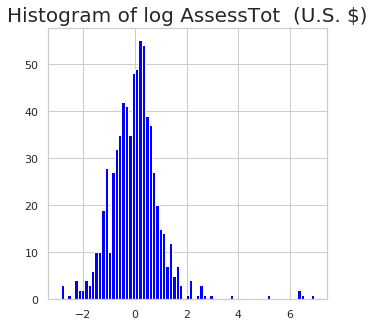

In [43]:
# plot the distributions 
plt.figure(figsize=(5, 5))
plt.hist(solar_data['logAssessTot'], bins=75, color='blue')
plt.title('Histogram of log AssessTot  (U.S. $)', fontsize=20)

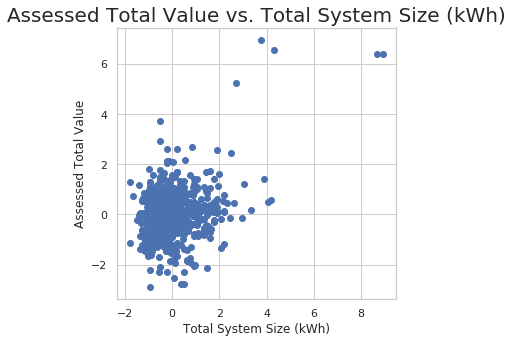

In [44]:
plt.figure(figsize = (5, 5))
plt.scatter(solar_data['SystemSizekWh'], solar_data['logAssessTot'], c='b')
plt.xlabel('Total System Size (kWh)')
plt.ylabel('Assessed Total Value')
plt.title('Assessed Total Value vs. Total System Size (kWh)', fontsize = 20)

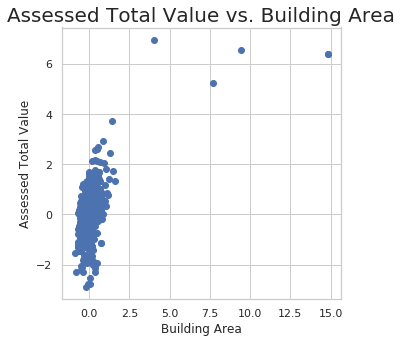

In [45]:
plt.figure(figsize = (5, 5))
plt.scatter(solar_data['BldgArea'], solar_data['logAssessTot'], c='b')
plt.xlabel('Building Area')
plt.ylabel('Assessed Total Value')
plt.title('Assessed Total Value vs. Building Area', fontsize = 20)

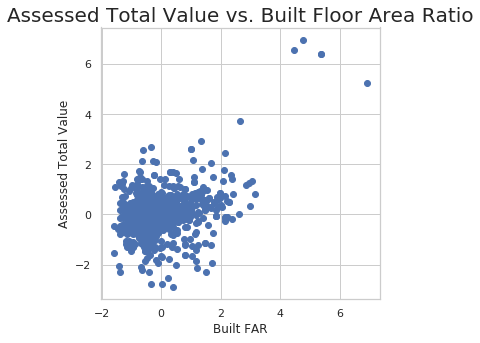

In [46]:
plt.figure(figsize = (5, 5))
plt.scatter(solar_data['BuiltFAR'], solar_data['logAssessTot'], c='b')
plt.xlabel('Built FAR')
plt.ylabel('Assessed Total Value')
plt.title('Assessed Total Value vs. Built Floor Area Ratio', fontsize = 20)

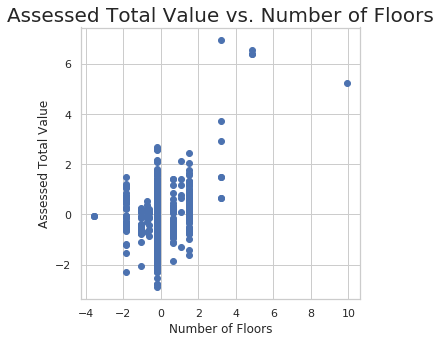

In [47]:
plt.figure(figsize = (5, 5))
plt.scatter(solar_data['NumFloors'], solar_data['logAssessTot'], c='b')
plt.xlabel('Number of Floors')
plt.ylabel('Assessed Total Value')
plt.title('Assessed Total Value vs. Number of Floors', fontsize = 20)

## linear regression

In [48]:
# run the regression --> unrestricted model 
solar_mod = smf.ols(formula = 'logAssessTot ~ BldgArea + BuiltFAR + NumFloors + Age + SystemSizekWh', 
                    data = solar_data).fit()
print(solar_mod.summary())

                            OLS Regression Results                            
Dep. Variable:           logAssessTot   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     111.4
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           4.95e-87
Time:                        15:13:30   Log-Likelihood:                -818.14
No. Observations:                 723   AIC:                             1648.
Df Residuals:                     717   BIC:                             1676.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.545e-15      0.028  -9.08e-14

In [49]:
# run the regression --> restricted model 
solar_mod2 = smf.ols(formula = 'logAssessTot ~ BldgArea + Age + SystemSizekWh', data = solar_data).fit()
print(solar_mod2.summary())

                            OLS Regression Results                            
Dep. Variable:           logAssessTot   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     183.5
Date:                Mon, 17 Dec 2018   Prob (F-statistic):           2.52e-88
Time:                        15:13:30   Log-Likelihood:                -820.40
No. Observations:                 723   AIC:                             1649.
Df Residuals:                     719   BIC:                             1667.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.545e-15      0.028  -9.07e-14

In [50]:
# use the likelihood ratio test to determine which model is preferable
solar_mod.compare_lr_test(solar_mod2)

(4.5372911244448915, 0.10345220480866898, 2.0)

The likelihood ratio test returned a p-value of 0.10 so we fail to reject the null hypothesis that the simpler model (solar_mod2) is preferable. 

## Bayesian Inference

In [51]:
# Create numpy arrays for PyMC3

logAssessTot = solar_data['logAssessTot'].as_matrix()
BldgArea = solar_data['BldgArea'].as_matrix()
Age = solar_data['Age'].as_matrix()
SystemSizekWh = solar_data['SystemSizekWh'].as_matrix()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [52]:
with pm.Model() as model:
    # come into the analysis with very diffuse priors 
    alpha = pm.Normal('alpha', mu=0, sd=20) # constant
    beta1 = pm.Normal('beta1', mu=0, sd=20) # 3 features 
    beta2 = pm.Normal('beta2', mu=0, sd=20)
    beta3 = pm.Normal('beta3', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # y_est is the specification of the Bayesian model to be estimated.  It is simply our CAPM.
    # PyMC3 needs this equation to do the estimation 
    y_est = alpha + beta1 * BldgArea + beta2 * Age + beta3 * SystemSizekWh
    
    # likelihood is the likelihood function, here it is normal to be used with conjugate priors.    
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=logAssessTot)
    
    # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
    start = pm.find_MAP()
    trace = pm.sample(1000, start=start, nuts_kwargs=dict(target_accept=.9), progressbar=True)

logp = -839.93, ||grad|| = 47.409: 100%|██████████| 17/17 [00:00<00:00, 1346.33it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta3, beta2, beta1, alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1834.05draws/s]


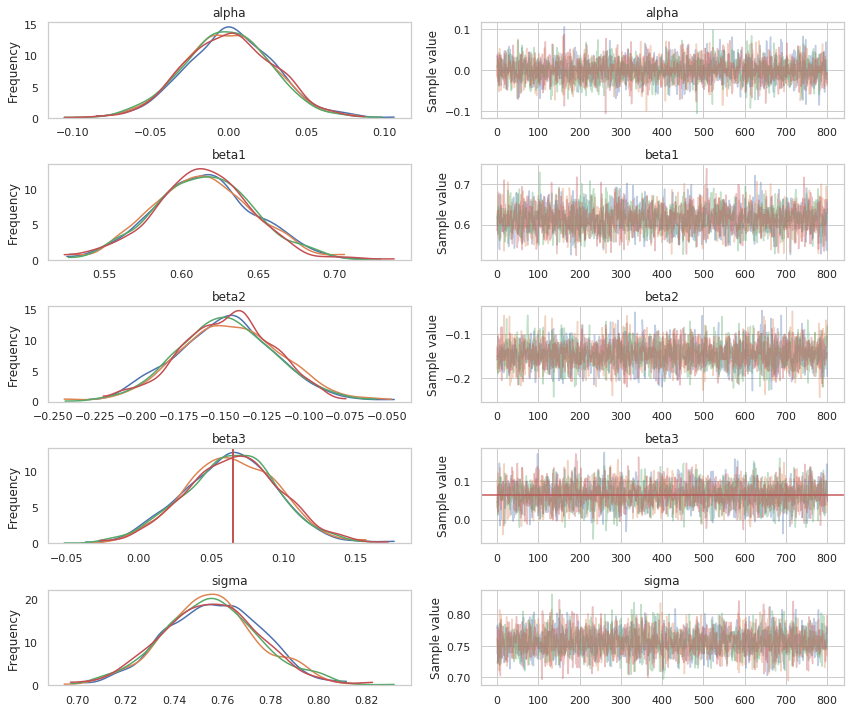

In [53]:
# Show results after burn in of 200 MCMC replications.

fig = pm.traceplot(trace[199:1000], lines={'beta3': 0.0654})
plt.figure(figsize = (10, 10))

In [54]:
print("The probability that returns to schooling exceed 0.05 is %f" % np.mean(trace['beta3'][199:1000] > 0.0654))

The probability that returns to schooling exceed 0.05 is 0.480649


## classification

In [55]:
# restrict columns in no_solar dataset
no_solar = no_solar[['AssessTot', 'BldgArea', 'BuiltFAR', 'NumFloors', 'Age']]
# calculate log of assessed total value
no_solar['logAssessTot'] = np.log10(no_solar['AssessTot'])
# whiten the no_solar data as part of preprocessing to reduce covariance
no_solar_data = pd.DataFrame(columns=no_solar.columns, data=preprocessing.scale(no_solar))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [56]:
# add indicators for unwhitened datasets
solar_not_whiten = regress[['AssessTot', 'BldgArea', 'BuiltFAR', 'NumFloors', 'Age', 'logAssessTot']]
no_solar_not_whiten = no_solar
solar_not_whiten['Solar'] = 1
no_solar_not_whiten['Solar'] = 0
# combine 
combined_not_whiten = pd.concat([solar_not_whiten, no_solar_not_whiten])

In [57]:
# confirm that whitening was done correctly (each variable should have mean=0, std=1)
print('AssessTot mean, std:', no_solar_data.AssessTot.mean(), no_solar_data.AssessTot.std())
print('BldgArea mean, std:', no_solar_data.BldgArea.mean(), no_solar_data.BldgArea.std())
print('BuiltFAR mean, std:', no_solar_data.BuiltFAR.mean(), no_solar_data.BuiltFAR.std())
print('NumFloors mean, std:', no_solar_data.NumFloors.mean(), no_solar_data.NumFloors.std())
print('Age mean, std:', no_solar_data.Age.mean(), no_solar_data.Age.std())
print('logAssessTot mean, std:', no_solar_data.logAssessTot.mean(), no_solar_data.logAssessTot.std())

AssessTot mean, std: -1.917098010621803e-17 1.0006942034852033
BldgArea mean, std: 1.512890598743712e-17 1.0006942034852035
BuiltFAR mean, std: -9.731774640264896e-17 1.0006942034852049
NumFloors mean, std: 1.2480385041035913e-16 1.000694203485203
Age mean, std: 3.302951994203829e-17 1.0006942034852067
logAssessTot mean, std: 1.6969012110082143e-16 1.0006942034852055


In [58]:
# add a solar indicators to the solar_data and no_solar tables 
solar_data['Solar'] = 1
no_solar_data['Solar'] = 0

In [59]:
# drop columns so we can concatenate the tables 
solar_data = solar_data[['AssessTot', 'BldgArea', 'BuiltFAR', 'NumFloors', 'Age', 'logAssessTot', 'Solar']]

In [60]:
# combine solar and no_solar into one table to use with logit classifier 
combined = pd.concat([solar_data, no_solar])

In [61]:
combined.columns

Index(['AssessTot', 'BldgArea', 'BuiltFAR', 'NumFloors', 'Age', 'logAssessTot',
       'Solar'],
      dtype='object')

Notes
1. Solar is categorical: 0 is "No Solar Installed", 1 is "Solar Installed".
2. logAssessTot is log10 of the Assessed Total Value of the property. 
3. BldgArea is continuous measure of the building's area in square feet. 
4. BuiltFAR is continuous measure of the total building floor area divided by the area of the tax lot. 
5. Number of Floors is number of floors in the building. 
6. Age is age of the building. 

## linear probability model

In [62]:
# run the linear probability model (assumes data is linear)
# remove BuiltFAR and NumFloors, not statistically significant 

# experiment with taking age out of the model 
linear_prob_mod = smf.ols(formula='Solar ~ logAssessTot + BldgArea + Age', data = combined).fit()
print(linear_prob_mod.summary())

# age has a negative effect --> older buildings are less likely to have solar 
# it's easier to install solar on buildings with new roofs 

                            OLS Regression Results                            
Dep. Variable:                  Solar   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     4248.
Date:                Mon, 17 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:13:45   Log-Likelihood:                 603.46
No. Observations:                1444   AIC:                            -1199.
Df Residuals:                    1440   BIC:                            -1178.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9493      0.006    164.211   

In [63]:
# assumes linearity in the data 
print(combined.describe())
print() 
print(linear_prob_mod.params)
print()
p = linear_prob_mod.params['Intercept'] + linear_prob_mod.params['logAssessTot'] * 2.239655 + \
        linear_prob_mod.params['BldgArea'] * 1812.029778 + linear_prob_mod.params['Age'] * 81.467452
print("The probability is %f" % p)

          AssessTot       BldgArea     BuiltFAR    NumFloors          Age  \
count  1.444000e+03    1444.000000  1444.000000  1444.000000  1444.000000   
mean   4.389552e+04    1812.029778     0.426918     1.025637    81.467452   
std    3.334425e+05   15005.219868     0.928057     1.438685   294.681863   
min   -6.005619e-01      -0.911229    -1.582972    -3.572403    -2.049516   
25%   -1.154081e-01      -0.123423    -0.282733    -0.194918     0.019700   
50%    1.337250e+01       0.723263     0.483479     1.071639     1.514972   
75%    2.641600e+04    1841.000000     0.930000     2.000000    87.250000   
max    1.053360e+07  534849.000000     6.915018    19.000000  2018.000000   

       logAssessTot        Solar  
count   1444.000000  1444.000000  
mean       2.239655     0.500693  
std        2.373122     0.500173  
min       -2.870389     0.000000  
25%        0.003026     0.000000  
50%        3.158023     1.000000  
75%        4.423684     1.000000  
max        7.022577     1.

**Interpretation**: According to the Linear Probability Model, the probability of a property having the predicted Assessed Total Value given average conditions for the independent variables is 50%. 

## logit classifier

In [64]:
# use logistic regression because the outcome is binary --> solar or no solar  
logit_mod = smf.logit('Solar ~ logAssessTot + BldgArea + BuiltFAR + NumFloors + Age', data = combined).fit()
print(logit_mod.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Solar   No. Observations:                 1444
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                            5
Date:                Mon, 17 Dec 2018   Pseudo R-squ.:                   1.000
Time:                        15:13:45   Log-Likelihood:            -8.3213e-08
converged:                      False   LL-Null:                       -1000.9
                                        LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.4347   9.96e+05   6.97e-05      1.000   -1.95e+06    1.95e+06
logAssessTot   -13.5380   2.58e+05  -5.25e-05      1.000   

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Results of the logistic regression run on the whitened data are not interpretable. All p-values are 1 and all features are statistically insignficant. 

In [65]:
# scale assessed total value 
combined_not_whiten['AssessTot_10000s'] = combined_not_whiten['AssessTot'] / 10000
combined['AssessTot_10000s'] = combined['AssessTot'] / 10000

In [66]:
# use logistic regression because the outcome is binary --> solar or no solar  
# run the regression on the unwhitened data
logit_mod = smf.logit('Solar ~ AssessTot_10000s + BldgArea + BuiltFAR + NumFloors + Age', data = combined_not_whiten).fit()
print(logit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.651788
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Solar   No. Observations:                 1444
Model:                          Logit   Df Residuals:                     1438
Method:                           MLE   Df Model:                            5
Date:                Mon, 17 Dec 2018   Pseudo R-squ.:                 0.05967
Time:                        15:13:45   Log-Likelihood:                -941.18
converged:                       True   LL-Null:                       -1000.9
                                        LLR p-value:                 4.120e-24
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7462      0.243      3.074      0.002       0.270       1.222
AssessTot_1

In [67]:
# remove values with p value > 0.05 
# remove BldgArea, BuiltFAR, NumFloors 
logit_mod = smf.logit('Solar ~ AssessTot_10000s + Age', data = combined_not_whiten).fit()
print(logit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.655851
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Solar   No. Observations:                 1444
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Dec 2018   Pseudo R-squ.:                 0.05381
Time:                        15:13:45   Log-Likelihood:                -947.05
converged:                       True   LL-Null:                       -1000.9
                                        LLR p-value:                 4.089e-24
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9283      0.152      6.088      0.000       0.629       1.227
AssessTot_1

In [68]:
# estimated coefficients are the log odds
# exponentiate the values to calculate the odds 
np.exp(logit_mod.params)

Intercept           2.530201
AssessTot_10000s    0.956127
Age                 0.990494
dtype: float64

## classification algorithms

In [69]:
# split solar dataset into 2/3 train and 1/3 test 
np.random.seed(1964)
combined_not_whiten['index'] = np.random.uniform(low = 0, high = 1, size = len(combined_not_whiten))
combined_not_whiten['test'] = pd.get_dummies(combined_not_whiten['index'] <= 0.3333)[1]

# We don't need the index, so drop it.
del combined_not_whiten['index']

# Now we can create new train and test dataframes.
combinedtest = combined_not_whiten[combined_not_whiten['test'] == 1]
combinedtrain = combined_not_whiten[combined_not_whiten['test'] == 0]

# Confirm data has been split properly.
print(len(combinedtrain))
print(len(combinedtest))
print(len(combined))

954
490
1444


In [70]:
# Logit classifier 
logit_mod = smf.logit('Solar ~ AssessTot_10000s + Age', data = combinedtrain).fit()
print()
print(logit_mod.summary())
pred = np.array(logit_mod.predict(combinedtest))
combinedtest['pred'] = logit_mod.predict(combinedtest)

Optimization terminated successfully.
         Current function value: 0.656090
         Iterations 8

                           Logit Regression Results                           
Dep. Variable:                  Solar   No. Observations:                  954
Model:                          Logit   Df Residuals:                      951
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Dec 2018   Pseudo R-squ.:                 0.05287
Time:                        15:13:45   Log-Likelihood:                -625.91
converged:                       True   LL-Null:                       -660.85
                                        LLR p-value:                 6.683e-16
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9903      0.188      5.258      0.000       0.621       1.359
AssessTot_

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
# estimated coefficients are the log odds
# exponentiate the values to calculate the odds 
np.exp(logit_mod.params)

Intercept           2.691932
AssessTot_10000s    0.961798
Age                 0.990159
dtype: float64

In [72]:
# calculate the odds ratios and probabilities 
odds_ratio = np.exp(-0.0390)
probability = odds_ratio / (1 + odds_ratio)
probability

0.4902512356245618

In [73]:
# calculate the odds ratios and probabilities 
odds_ratio = np.exp(-0.0099)
probability = odds_ratio / (1 + odds_ratio) 
probability

0.49752502021436434

**Interpretation**: According to the Logit Classifier, if the assessed total value of a property goes down $10,000, then the likelihood of that property having solar goes down 49% and if the age of a property goes up one unit then the likelihood of that property having solar goes down 49%. 

## K Nearest Neighbors

In [74]:
ytrain = combinedtrain['Solar'].as_matrix(columns=None)
ytest = combinedtest['Solar'].as_matrix(columns=None)

Xtrain = combinedtrain[['Age', 'BldgArea', 'BuiltFAR', 'NumFloors', 'logAssessTot']].as_matrix(columns=None)
Xtest = combinedtest[['Age', 'BldgArea', 'BuiltFAR', 'NumFloors', 'logAssessTot']].as_matrix(columns=None)

# square root of 1446
NN = 38 
how = 'distance'
knn = neighbors.KNeighborsClassifier(NN, how)
knn.fit(Xtrain, ytrain)

ypred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
KNN_cm = cm
KNN_MSE = mean_squared_error(ytest, ypred)

KNN_ACC = (KNN_cm[0][0] + KNN_cm[1][1]) / (len(ypred))

table = [[" ","0", "1"],
         ["0", cm[0][0], cm[0][1]], 
         ["1", cm[1][0], cm[1][1]]] 
    

print("The confusion matrix is:")
print(tabulate(KNN_cm, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", KNN_ACC)
print("The Mean Squared Error is", KNN_MSE)

The confusion matrix is:
╒═════╤═════╕
│ 145 │ 113 │
├─────┼─────┤
│ 79  │ 153 │
╘═════╧═════╛
The Accuracy Rate is 0.608163265306
The Mean Squared Error is 0.391836734694


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


## Random Forest

In [ ]:
# RFF 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1964)
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
RF_cm = cm
RF_MSE = mean_squared_error(ytest, ypred)

RF_ACC = (RF_cm[0][0] + RF_cm[1][1]) / (len(ypred))

table = [[" ","0", "1"],
         ["0", RF_cm[0][0], RF_cm[0][1]], 
         ["1", RF_cm[1][0], RF_cm[1][1]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", RF_ACC)
print("The Mean Squared Error is", RF_MSE)

## Linear Discriminant Analysis

In [ ]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(Xtrain, ytrain)
ypred = lda.predict(Xtest)
LDA_MSE = mean_squared_error(ytest, ypred)

LDA_cm = confusion_matrix(ytest, ypred)

LDA_ACC = (LDA_cm[0][0] + LDA_cm[1][1]) / (len(ypred))

table = [[" ","0", "1"],
         ["0", LDA_cm[0][0], LDA_cm[0][1]], 
         ["1", LDA_cm[1][0], LDA_cm[1][1]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", LDA_ACC)
print("The Mean Squared Error is", LDA_MSE)

## MN Logit

In [ ]:
# MNL 
from statsmodels.discrete.discrete_model import MNLogit

mnlogit = MNLogit(combinedtrain['Solar'], combinedtrain[['Age', 'BldgArea', 'BuiltFAR', 'NumFloors', 
                                                         'logAssessTot']]).fit()
print(mnlogit.summary())
print()
pred = np.array(mnlogit.predict(combinedtest[['Age', 'BldgArea', 'BuiltFAR', 'NumFloors', 
                                                         'logAssessTot']]))

prediction = np.zeros((len(ypred),), dtype=np.int) + 3
for i in range(len(prediction)): 
    if pred[i][0] > pred[i][1] and pred[i][0]: prediction[i] = 0
    if pred[i][1] > pred[i][0] and pred[i][1]: prediction[i] = 1
        
MNLcm = confusion_matrix(ytest, prediction)
MNLMSE = mean_squared_error(ytest, prediction)

ACC = (MNLcm[0][0] + MNLcm[1][1]) / (len(ypred))

table = [[" ","0", "1"],
         ["0", MNLcm[0][0], MNLcm[0][1]], 
         ["1", MNLcm[1][0], MNLcm[1][1]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MNLMSE)

## Naive Bayes

In [ ]:
# NB 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)
NB_MSE = mean_squared_error(ytest, ypred)

NB_cm = confusion_matrix(ytest, ypred)

NB_ACC = (NB_cm[0][0] + NB_cm[1][1]) / (len(ypred))

table = [[" ","0", "1"],
         ["0", NB_cm[0][0], NB_cm[0][1]], 
         ["1", NB_cm[1][0], NB_cm[1][1]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", NB_ACC)
print("The Mean Squared Error is", NB_MSE)

## Guessing

In [ ]:
# Guessing
ypred = np.random.permutation(ytest)
RAN_cm = confusion_matrix(ytest, ypred)
RAN_ACC = (RAN_cm[0][0] + RAN_cm[1][1]) / (len(ypred))
RAN_MSE = mean_squared_error(ytest, ypred)

print("The Accuracy Rate is", RAN_ACC)
print("The Mean Squared Error is", RAN_MSE)

In [ ]:
# for MNL 
endogtrain = combinedtrain['Solar']
exogtrain = combinedtrain[['Age', 'BldgArea', 'BuiltFAR', 'NumFloors', 'logAssessTot']]
exogtest = combinedtest[['Age', 'BldgArea', 'BuiltFAR', 'NumFloors', 'logAssessTot']]

In [ ]:
# KNN, RF, LDA, MNL, and NB Classifiers using solar data.  Let's bring this all together for ease of use.

NN = 38
how = 'distance'
ypred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
knnACC = (cm[0][0] + cm[1][1]) / (len(ypred))
knnMSE = mean_squared_error(ytest, ypred)

rf = RandomForestClassifier(n_estimators = 20)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
rfACC = (cm[0][0] + cm[1][1]) / (len(ypred))
rfMSE = mean_squared_error(ytest, ypred)

lda = LDA()
lda.fit(Xtrain, ytrain)
ypred = lda.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
ldaACC = (cm[0][0] + cm[1][1]) / (len(ypred))
ldaMSE = mean_squared_error(ytest, ypred)

mnlogit = MNLogit(endogtrain, exogtrain).fit()
pred = np.array(mnlogit.predict(exogtest))
prediction = np.zeros((len(ypred),), dtype=np.int) + 2
for i in range(len(prediction)): 
    if pred[i][0] > pred[i][1] and pred[i][0]: prediction[i] = 0
    if pred[i][1] > pred[i][0] and pred[i][1]: prediction[i] = 1
cm = confusion_matrix(ytest, prediction)
mnlACC = (cm[0][0] + cm[1][1]) / (len(ypred))
mnlMSE = mean_squared_error(ytest, prediction)

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
nbACC = (cm[0][0] + cm[1][1]) / (len(ypred))
nbMSE = mean_squared_error(ytest, ypred)

# What would a confusion matrix with random allocation look like?

ypred = np.random.permutation(ytest)
cm = confusion_matrix(ytest, ypred)
ranACC = (cm[0][0] + cm[1][1]) / (len(ypred))
ranMSE = mean_squared_error(ytest, ypred)

In [ ]:
# Here is the relative performance of our classifiers, including random guessing.

print('Accuracy of KNN, RF, LDA, MNL, NB, and Guessing')
print('%f %f %f %f %f %f' % (knnACC, rfACC, ldaACC, mnlACC, nbACC, ranACC))
print('')
print('MSE of KNN, RF, LDA, MNL, NB, and Guessing')
print('%f %f %f %f %f %f' % (knnMSE, rfMSE, ldaMSE, mnlMSE, nbMSE, ranMSE))

In [ ]:
# format table     
table = [["Algorithm","Accuracy", "MSE"],
         ["KNN", "{0:.3f}".format(knnACC), "{0:.3f}".format(knnMSE)], 
         ["RF", "{0:.3f}".format(rfACC), "{0:.3f}".format(rfMSE)],
         ["LDA", "{0:.3f}".format(ldaACC), "{0:.3f}".format(ldaMSE)],
         ["MNL", "{0:.3f}".format(mnlACC), "{0:.3f}".format(mnlMSE)],
         ["NB", "{0:.3f}".format(nbACC), "{0:.3f}".format(nbMSE)],
         ["Guessing", "{0:.3f}".format(ranACC), "{0:.3f}".format(ranMSE)]]

#print("Accuracy and MSE for Clustering Algorithms")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))